# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# appending the path:
import sys
sys.path.append("..")
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
weather_api_key

'362bbf27cb3b49f5d979ffae74ea5e34'

In [4]:
cities_subset = cities[:5]
url = f"https://api.openweathermap.org/data/2.5/weather?"

for city in cities_subset:
    city_url = url + f"q={city}&appid={weather_api_key}"
    response = requests.get(city_url)
    print(response.json())

{'coord': {'lon': 48.2899, 'lat': 42.0678}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.09, 'feels_like': 298.28, 'temp_min': 298.09, 'temp_max': 298.09, 'pressure': 1010, 'humidity': 63, 'sea_level': 1010, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 283, 'gust': 3.77}, 'clouds': {'all': 0}, 'dt': 1722454984, 'sys': {'country': 'RU', 'sunrise': 1722389951, 'sunset': 1722442026}, 'timezone': 10800, 'id': 566532, 'name': 'Derbent', 'cod': 200}
{'coord': {'lon': 121.0308, 'lat': 14.5665}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 300.98, 'feels_like': 306.53, 'temp_min': 300.38, 'temp_max': 301.13, 'pressure': 1010, 'humidity': 91, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1722454984, 'sys': {'type': 1, 'id': 

In [5]:
cities_subset[0]

'derbent'

In [6]:
city_weather = response.json()
city_weather

{'coord': {'lon': -72.4875, 'lat': -51.7236},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 275.4,
  'feels_like': 273.25,
  'temp_min': 275.4,
  'temp_max': 275.4,
  'pressure': 999,
  'humidity': 93,
  'sea_level': 999,
  'grnd_level': 996},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 120},
 'rain': {'1h': 0.17},
 'clouds': {'all': 75},
 'dt': 1722454985,
 'sys': {'type': 1,
  'id': 8495,
  'country': 'CL',
  'sunrise': 1722428880,
  'sunset': 1722461068},
 'timezone': -10800,
 'id': 3874958,
 'name': 'Puerto Natales',
 'cod': 200}

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)


# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | derbent
Processing Record 2 of Set 1 | poblacion, san felipe
Processing Record 3 of Set 1 | awjilah
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | kourou
Processing Record 7 of Set 1 | cadale
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | ulsteinvik
Processing Record 16 of Set 1 | ghanzi
Processing Record 17 of Set 1 | kill devil hills
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | tympaki
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | peman

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,derbent,42.0678,48.2899,298.09,63,0,3.38,RU,1722454984
1,"poblacion, san felipe",14.5665,121.0308,301.13,91,40,0.51,PH,1722454984
2,awjilah,29.1081,21.2869,303.54,40,0,6.83,LY,1722454757
3,kodiak,57.7900,-152.4072,290.88,45,0,9.26,US,1722454985
4,puerto natales,-51.7236,-72.4875,275.40,93,75,2.06,CL,1722454985


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,derbent,42.0678,48.2899,298.09,63,0,3.38,RU,1722454984
1,"poblacion, san felipe",14.5665,121.0308,301.13,91,40,0.51,PH,1722454984
2,awjilah,29.1081,21.2869,303.54,40,0,6.83,LY,1722454757
3,kodiak,57.7900,-152.4072,290.88,45,0,9.26,US,1722454985
4,puerto natales,-51.7236,-72.4875,275.40,93,75,2.06,CL,1722454985


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

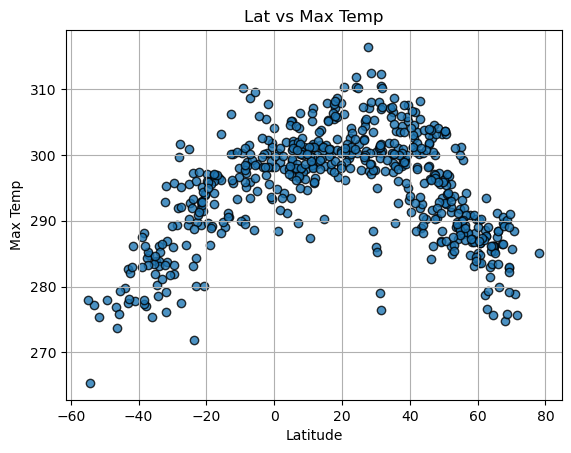

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolors="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label = "Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Lat vs Max Temp")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

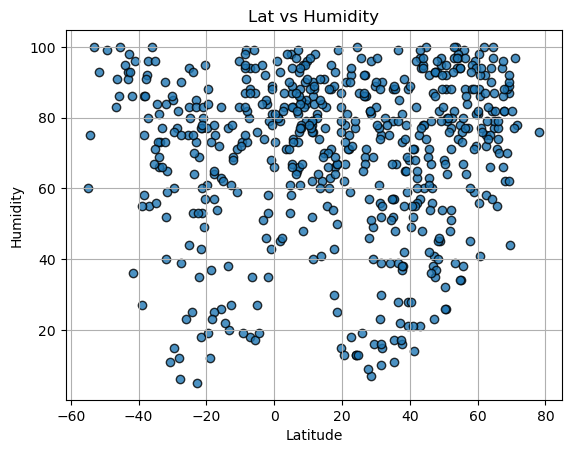

In [29]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolors="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label = "Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Lat vs Humidity")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
## plt.show()
plt.show()


#### Latitude Vs. Cloudiness

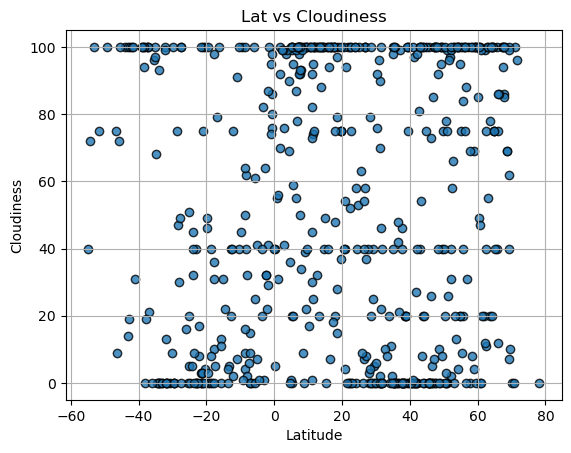

In [30]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolors="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label = "Cities"
)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Lat vs Cloudiness")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

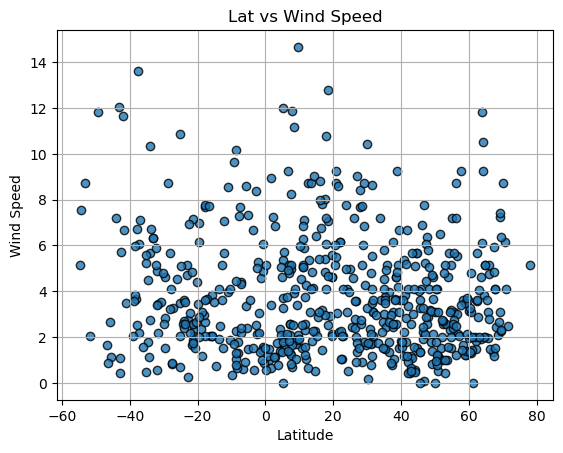

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolors="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label = "Cities"
)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Lat vs Wind Speed")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


Lineare Regression: $$ y_{hat} = x_i* \theta + \beta $$

In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_lr(x_values, y_values, ylabel, text_coords):
    slope, intercept, r_value, _ , _ = linregress(x_values,y_values)

    regress_values = x_values * slope + intercept
    lin_eq = f"y = {slope:.3f} x + {intercept:.3f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values)
    plt.annotate(lin_eq,text_coords, fontsize=10, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    print(f"The r-valueis: {r_value**2:.4f}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df.Lat >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,derbent,42.0678,48.2899,298.09,63,0,3.38,RU,1722454984
1,"poblacion, san felipe",14.5665,121.0308,301.13,91,40,0.51,PH,1722454984
2,awjilah,29.1081,21.2869,303.54,40,0,6.83,LY,1722454757
3,kodiak,57.7900,-152.4072,290.88,45,0,9.26,US,1722454985
5,kourou,5.1552,-52.6478,305.18,67,0,3.72,GF,1722455178


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df.Lat < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,puerto natales,-51.7236,-72.4875,275.40,93,75,2.06,CL,1722454985
7,punta arenas,-53.1500,-70.9167,277.21,100,100,8.75,CL,1722455181
8,grytviken,-54.2811,-36.5092,265.37,75,72,7.54,GS,1722455182
9,port elizabeth,-33.9180,25.5701,286.10,81,0,5.66,ZA,1722455184
10,ushuaia,-54.8000,-68.3000,277.96,60,40,5.14,AR,1722455185


###  Temperature vs. Latitude Linear Regression Plot

The r-valueis: 0.3667


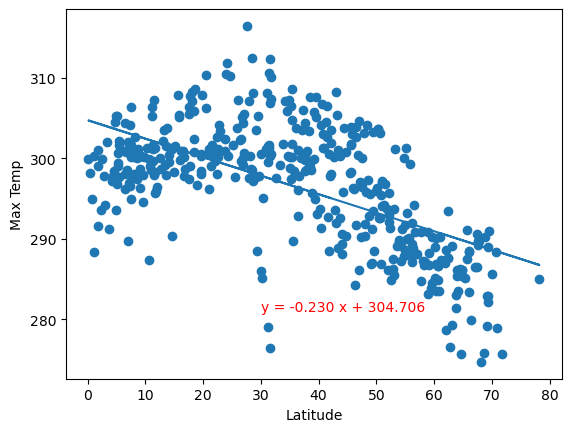

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_lr(x_values=x_values,y_values=y_values,ylabel="Max Temp",text_coords=(30,281))

The r-valueis: 0.6557


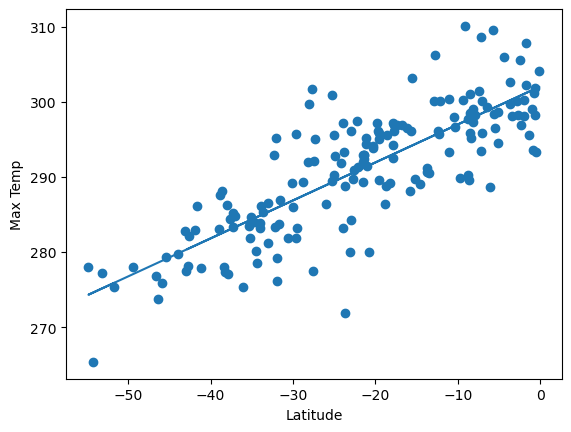

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_lr(x_values=x_values,y_values=y_values,ylabel="Max Temp",text_coords=(30,281))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-valueis: 0.0190


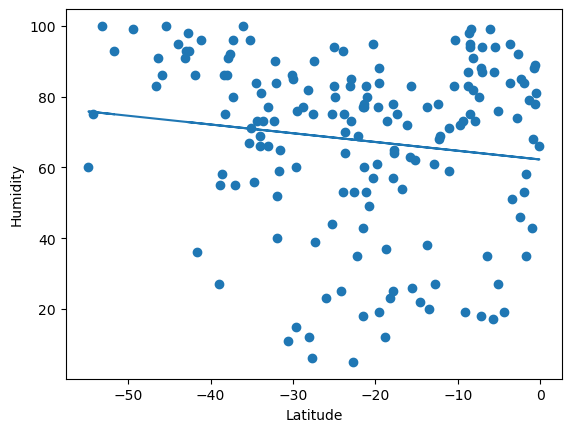

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_lr(x_values=x_values,y_values=y_values,ylabel="Humidity",text_coords=(30,281))

The r-valueis: 0.0190


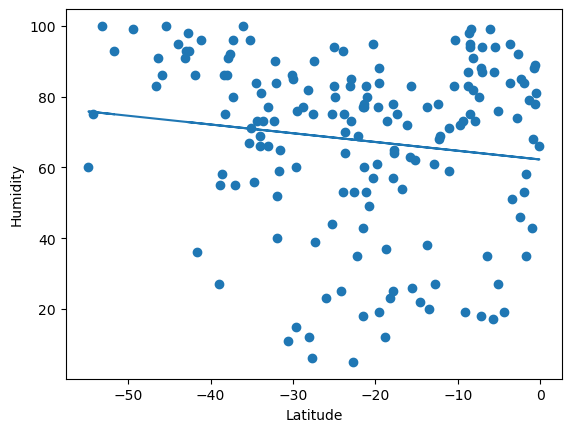

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_lr(x_values=x_values,y_values=y_values,ylabel="Humidity",text_coords=(30,281))

### Cloudiness vs. Latitude Linear Regression Plot

The r-valueis: 0.0070


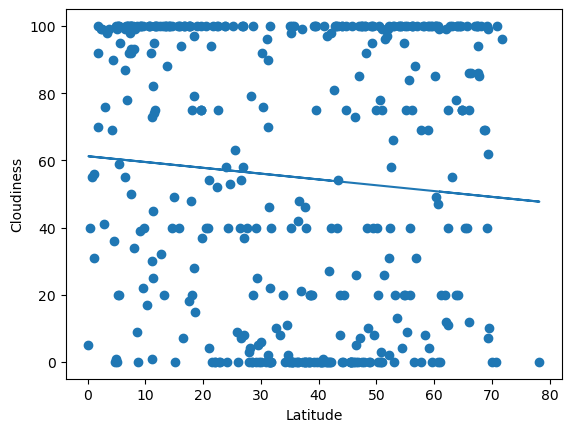

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_lr(x_values=x_values,y_values=y_values,ylabel="Cloudiness",text_coords=(30,281))

The r-valueis: 0.0265


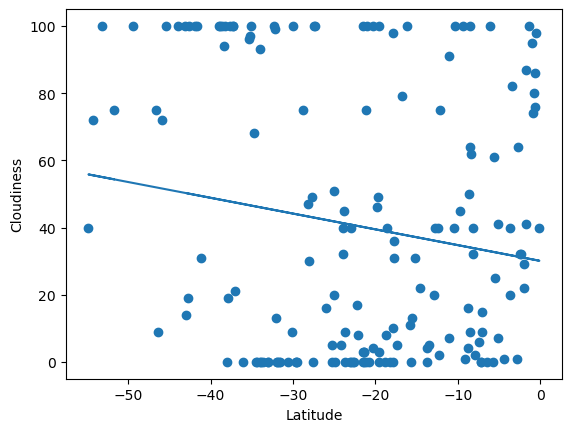

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_lr(x_values=x_values,y_values=y_values,ylabel="Cloudiness",text_coords=(30,281))

### Wind Speed vs. Latitude Linear Regression Plot

The r-valueis: 0.0116


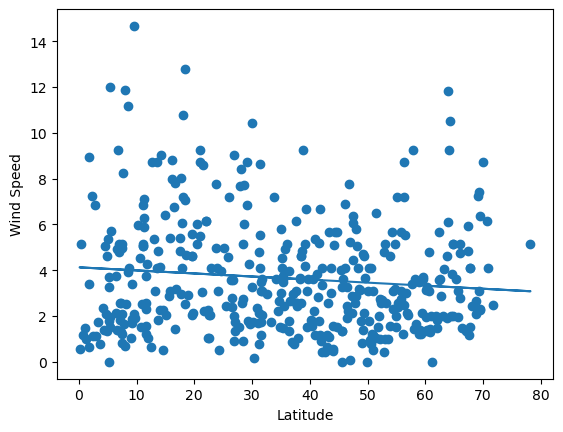

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_lr(x_values=x_values,y_values=y_values,ylabel="Wind Speed",text_coords=(30,281))

The r-valueis: 0.0420


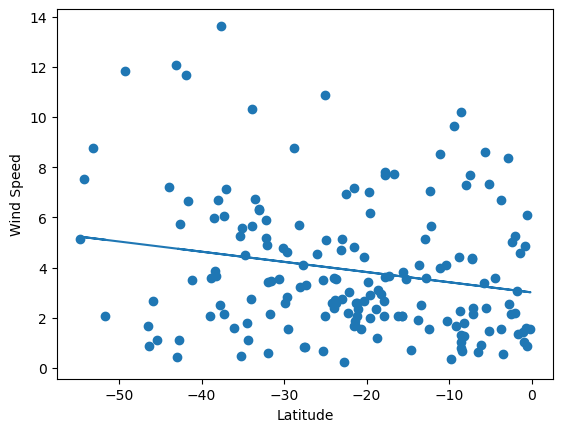

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_lr(x_values=x_values,y_values=y_values,ylabel="Wind Speed",text_coords=(30,281))